In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score,plot_roc_curve

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


### Loaded Data from drive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset.csv")
#df = df.sample(frac = 0.2)
print(df.shape)

(26880, 57)


In [ ]:
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
0,0,inf,1.968445,3.781433,6.967726,25.003789,-0.108340,9.035341,51.268785,-1.305514,-1.687820,-0.956327,0.706124,0.520655,1.024104,-0.263459,-0.406330,-0.057951,745.026347,0.518683,2.294020,0.042752,323.753715,58.869597,10.025391,0.000132,0.000726,32.293374,5.500232,6.938894e-17,-0.687823,0.631825,33.304875,8.366145,71.104794,283044.154576,13578.744515,980934.785078,8.847090e-17,-0.053753,0.060647,6.599142,1.715184,16.641077,10907.472894,570.720542,53723.729504,57084.052005,1073.243804,346297.112134,2.565184e+06,71368.302580,9.361319e+06,7.91,6.15,6.67,7.63
1,1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05,7.91,6.15,6.67,7.63
2,2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06,7.91,6.15,6.67,7.63
3,3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06,7.91,6.15,6.67,7.63
4,4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06,7.91,6.15,6.67,7.63


## Removing the infinite values from the dataset

In [ ]:
df.shape

(26880, 57)

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
0,0,NaN,1.968445,3.781433,6.967726,25.003789,-0.108340,9.035341,51.268785,-1.305514,-1.687820,-0.956327,0.706124,0.520655,1.024104,-0.263459,-0.406330,-0.057951,745.026347,0.518683,2.294020,0.042752,323.753715,58.869597,10.025391,0.000132,0.000726,32.293374,5.500232,6.938894e-17,-0.687823,0.631825,33.304875,8.366145,71.104794,283044.154576,13578.744515,980934.785078,8.847090e-17,-0.053753,0.060647,6.599142,1.715184,16.641077,10907.472894,570.720542,53723.729504,57084.052005,1073.243804,346297.112134,2.565184e+06,71368.302580,9.361319e+06,7.91,6.15,6.67,7.63
1,1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05,7.91,6.15,6.67,7.63
2,2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06,7.91,6.15,6.67,7.63
3,3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06,7.91,6.15,6.67,7.63
4,4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06,7.91,6.15,6.67,7.63


In [ ]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["coeff_var"], how="all")
df.shape

(26136, 57)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df['dominance']

1        6.67
2        6.67
3        6.67
4        6.67
5        6.67
         ... 
26875    6.17
26876    6.17
26877    6.17
26878    6.17
26879    6.17
Name: dominance, Length: 26136, dtype: float64

# Changing the output labels to Categorical type

### We have divided into only into two classes with a threshold of 4.5.
### We can divide into thress classes or change threshold , could be our hyperparameter and we can tune to get better results

In [ ]:
df['dominance'] = np.where(df['dominance']<=4 , 0, df['dominance'])
df['dominance'] = np.where(df['dominance']>4 , 1, df['dominance'])
df['valence'] = np.where(df['valence']<=4 , 0, df['valence'])
df['valence'] = np.where(df['valence']>4 , 1, df['valence'])
df['arousal'] = np.where(df['arousal']<=4 , 0, df['arousal'])
df['arousal'] = np.where(df['arousal']>4 , 1, df['arousal'])
df['liking'] = np.where(df['liking']<=4 , 0, df['liking'])
df['liking'] = np.where(df['liking']>4 , 1, df['liking'])


In [ ]:
df['dominance'].unique()

array([1., 0.])

In [ ]:
# plot bar graph showing the distribution of anmomolous to non-anomolous transactions
count_classes = pd.value_counts(df['liking'], sort = True)
count_classes
# got  - 492 fraud trnasactions

1.0    19316
0.0     6820
Name: liking, dtype: int64

<BarContainer object of 2 artists>

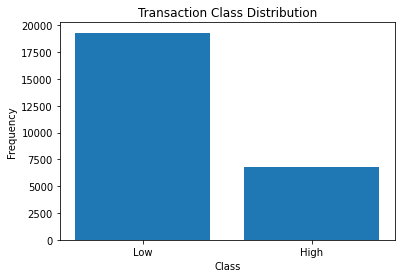

In [ ]:
names = ["Low","High"]
values = count_classes
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.bar(names,values)

In [ ]:
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
1,1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05,1.0,1.0,1.0,1.0
2,2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06,1.0,1.0,1.0,1.0
3,3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06,1.0,1.0,1.0,1.0
4,4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06,1.0,1.0,1.0,1.0
5,5,21.068922,1.978037,4.438428,5.931410,28.607774,-0.042457,7.590096,47.573406,-1.224950,-1.533386,-0.815867,0.683165,0.593045,0.773488,-0.242990,-0.408387,-0.044327,374.320370,0.632694,1.956614,0.040687,140.404364,39.567139,12.284715,0.000290,0.001028,11.429192,3.549538,-1.387779e-17,-0.941164,0.652005,23.119072,5.681090,51.873429,137232.934577,6263.740351,522041.292553,-5.204170e-18,-0.040246,0.058274,5.439941,1.609547,12.816591,7224.609816,502.593097,31867.747248,35059.744416,800.645468,186025.445662,1.165839e+06,28539.765305,5.024418e+06,1.0,1.0,1.0,1.0


In [ ]:
df.shape

(26136, 57)

## Choosing our X and Y

In [ ]:
X = df.drop(['valence','liking','dominance','arousal'],axis = 1)
X.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
1,1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05
2,2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06
3,3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06
4,4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06
5,5,21.068922,1.978037,4.438428,5.931410,28.607774,-0.042457,7.590096,47.573406,-1.224950,-1.533386,-0.815867,0.683165,0.593045,0.773488,-0.242990,-0.408387,-0.044327,374.320370,0.632694,1.956614,0.040687,140.404364,39.567139,12.284715,0.000290,0.001028,11.429192,3.549538,-1.387779e-17,-0.941164,0.652005,23.119072,5.681090,51.873429,137232.934577,6263.740351,522041.292553,-5.204170e-18,-0.040246,0.058274,5.439941,1.609547,12.816591,7224.609816,502.593097,31867.747248,35059.744416,800.645468,186025.445662,1.165839e+06,28539.765305,5.024418e+06


In [ ]:
X = X.drop(['Unnamed: 0'],axis = 1)
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05
2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06
3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06
4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06
5,21.068922,1.978037,4.438428,5.931410,28.607774,-0.042457,7.590096,47.573406,-1.224950,-1.533386,-0.815867,0.683165,0.593045,0.773488,-0.242990,-0.408387,-0.044327,374.320370,0.632694,1.956614,0.040687,140.404364,39.567139,12.284715,0.000290,0.001028,11.429192,3.549538,-1.387779e-17,-0.941164,0.652005,23.119072,5.681090,51.873429,137232.934577,6263.740351,522041.292553,-5.204170e-18,-0.040246,0.058274,5.439941,1.609547,12.816591,7224.609816,502.593097,31867.747248,35059.744416,800.645468,186025.445662,1.165839e+06,28539.765305,5.024418e+06


In [ ]:
df = df.drop(["Unnamed: 0"],axis = 1)  # removing useless column
df.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05,1.0,1.0,1.0,1.0
2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06,1.0,1.0,1.0,1.0
3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06,1.0,1.0,1.0,1.0
4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06,1.0,1.0,1.0,1.0
5,21.068922,1.978037,4.438428,5.931410,28.607774,-0.042457,7.590096,47.573406,-1.224950,-1.533386,-0.815867,0.683165,0.593045,0.773488,-0.242990,-0.408387,-0.044327,374.320370,0.632694,1.956614,0.040687,140.404364,39.567139,12.284715,0.000290,0.001028,11.429192,3.549538,-1.387779e-17,-0.941164,0.652005,23.119072,5.681090,51.873429,137232.934577,6263.740351,522041.292553,-5.204170e-18,-0.040246,0.058274,5.439941,1.609547,12.816591,7224.609816,502.593097,31867.747248,35059.744416,800.645468,186025.445662,1.165839e+06,28539.765305,5.024418e+06,1.0,1.0,1.0,1.0


In [ ]:
# Y consists of all 4 labels while small y consists of only one output label
Y = df[['valence','arousal','liking','dominance']]
Y.head()

,valence,arousal,liking,dominance
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


In [ ]:
y = df['valence']
y[0:5]

1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: valence, dtype: float64

In [ ]:
# converting y to np array and flattening using ravel
y = np.array(y)
y = y.ravel()
y[0:5]

array([1., 1., 1., 1., 1.])

In [ ]:
print(X.shape)
print(y.shape)

(26136, 52)
(26136,)


# Normalizing X



In [ ]:
columns = X.columns.tolist()
columns

['coeff_var',
 'fractal_dimension',
 'kurtosis',
 'secDiffMean',
 'secDiffMax',
 'skewness',
 'first_diff_mean',
 'first_diff_max',
 'AR1_mean',
 'AR1_min',
 'AR1_max',
 'AR2_mean',
 'AR2_min',
 'AR2_max',
 'AR3_mean',
 'AR3_min',
 'AR3_max',
 'hjorth_activity',
 'hjorth_mobility',
 'hjorth_complexity',
 'PMax1',
 'PMax2',
 'PMax3',
 'PMax4',
 'PRatio1',
 'PRatio2',
 'PRatio3',
 'PRatio4',
 'cA_mean_mean',
 'cA_mean_min',
 'cA_mean_max',
 'cA_std_mean',
 'cA_std_min',
 'cA_std_max',
 'cA_Energy_mean',
 'cA_Energy_min',
 'cA_Energy_max',
 'cD_mean_mean',
 'cD_mean_min',
 'cD_mean_max',
 'cD_std_mean',
 'cD_std_min',
 'cD_std_max',
 'cD_Energy_mean',
 'cD_Energy_min',
 'cD_Energy_max',
 'Entropy_D_mean',
 'Entropy_D_min',
 'Entropy_D_max',
 'Entropy_A_mean',
 'Entropy_A_min',
 'Entropy_A_max']

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(np.array(X))

In [ ]:
# Normalized dataframe
X_norm = pd.DataFrame(x_scaled)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.554409,0.954185,0.030077,0.037794,0.120741,0.485496,0.036127,0.024935,0.724688,0.687414,0.659533,0.254760,0.445797,0.204301,0.269042,0.342121,0.255645,0.000909,0.692956,0.145995,0.000195,0.000140,0.000595,0.002380,0.019768,0.003349,0.002076,0.008586,0.484848,0.992746,0.004273,0.018292,0.044101,0.023490,0.000686,0.006097,0.000866,0.531128,0.916412,0.044543,0.039008,0.026032,0.043098,0.002438,0.001863,0.002341,0.001146,0.000481,0.001183,0.000326,0.002930,0.000425
1,0.554409,0.872567,0.129534,0.060582,0.131236,0.475193,0.061065,0.044126,0.665895,0.637721,0.658954,0.189497,0.455001,0.129240,0.314959,0.368339,0.383652,0.004337,0.497850,0.335798,0.001236,0.003969,0.004046,0.005868,0.004805,0.003425,0.023577,0.037501,0.507856,0.973665,0.011974,0.051844,0.071469,0.063572,0.003761,0.011651,0.004859,0.531278,0.947279,0.017301,0.063816,0.041504,0.069742,0.005696,0.003582,0.005624,0.003131,0.001114,0.003268,0.002370,0.006323,0.003160
2,0.554409,0.875760,0.053308,0.051885,0.125660,0.527679,0.047793,0.036672,0.614474,0.659541,0.670539,0.306680,0.466124,0.249301,0.307996,0.388196,0.281158,0.002304,0.534602,0.240465,0.000127,0.000615,0.001839,0.004171,0.003213,0.000694,0.005096,0.012374,0.497334,0.994857,0.008207,0.035709,0.057111,0.053619,0.001990,0.008569,0.003571,0.535169,0.969899,0.019488,0.044034,0.029825,0.055853,0.003087,0.002242,0.003737,0.001514,0.000637,0.002011,0.001111,0.004325,0.002134
3,0.554409,0.948008,0.018495,0.055933,0.129882,0.527256,0.052124,0.031017,0.767878,0.719781,0.714437,0.241831,0.487635,0.163006,0.285184,0.299236,0.302467,0.001435,0.758943,0.109339,0.000091,0.000196,0.000354,0.004708,0.006989,0.002458,0.001488,0.018553,0.492144,0.988159,0.004702,0.024148,0.034689,0.032008,0.001037,0.004500,0.001449,0.512272,0.927194,0.035219,0.049951,0.028877,0.057046,0.003802,0.002144,0.003884,0.001907,0.000538,0.002090,0.000509,0.002080,0.000736
4,0.554409,0.882132,0.167490,0.040862,0.126643,0.495048,0.043023,0.043650,0.506503,0.444139,0.585915,0.256302,0.483220,0.195111,0.569984,0.513598,0.715080,0.004591,0.319054,0.460057,0.000664,0.003615,0.004140,0.005796,0.002809,0.001750,0.021728,0.033340,0.494949,0.973406,0.012228,0.056952,0.083737,0.067179,0.004446,0.014574,0.005372,0.525441,0.974891,0.019637,0.034175,0.030393,0.038623,0.001978,0.002301,0.001927,0.000904,0.000586,0.000937,0.002868,0.008747,0.003587


In [ ]:
X_norm.columns = columns
X_norm.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
0,0.554409,0.954185,0.030077,0.037794,0.120741,0.485496,0.036127,0.024935,0.724688,0.687414,0.659533,0.254760,0.445797,0.204301,0.269042,0.342121,0.255645,0.000909,0.692956,0.145995,0.000195,0.000140,0.000595,0.002380,0.019768,0.003349,0.002076,0.008586,0.484848,0.992746,0.004273,0.018292,0.044101,0.023490,0.000686,0.006097,0.000866,0.531128,0.916412,0.044543,0.039008,0.026032,0.043098,0.002438,0.001863,0.002341,0.001146,0.000481,0.001183,0.000326,0.002930,0.000425
1,0.554409,0.872567,0.129534,0.060582,0.131236,0.475193,0.061065,0.044126,0.665895,0.637721,0.658954,0.189497,0.455001,0.129240,0.314959,0.368339,0.383652,0.004337,0.497850,0.335798,0.001236,0.003969,0.004046,0.005868,0.004805,0.003425,0.023577,0.037501,0.507856,0.973665,0.011974,0.051844,0.071469,0.063572,0.003761,0.011651,0.004859,0.531278,0.947279,0.017301,0.063816,0.041504,0.069742,0.005696,0.003582,0.005624,0.003131,0.001114,0.003268,0.002370,0.006323,0.003160
2,0.554409,0.875760,0.053308,0.051885,0.125660,0.527679,0.047793,0.036672,0.614474,0.659541,0.670539,0.306680,0.466124,0.249301,0.307996,0.388196,0.281158,0.002304,0.534602,0.240465,0.000127,0.000615,0.001839,0.004171,0.003213,0.000694,0.005096,0.012374,0.497334,0.994857,0.008207,0.035709,0.057111,0.053619,0.001990,0.008569,0.003571,0.535169,0.969899,0.019488,0.044034,0.029825,0.055853,0.003087,0.002242,0.003737,0.001514,0.000637,0.002011,0.001111,0.004325,0.002134
3,0.554409,0.948008,0.018495,0.055933,0.129882,0.527256,0.052124,0.031017,0.767878,0.719781,0.714437,0.241831,0.487635,0.163006,0.285184,0.299236,0.302467,0.001435,0.758943,0.109339,0.000091,0.000196,0.000354,0.004708,0.006989,0.002458,0.001488,0.018553,0.492144,0.988159,0.004702,0.024148,0.034689,0.032008,0.001037,0.004500,0.001449,0.512272,0.927194,0.035219,0.049951,0.028877,0.057046,0.003802,0.002144,0.003884,0.001907,0.000538,0.002090,0.000509,0.002080,0.000736
4,0.554409,0.882132,0.167490,0.040862,0.126643,0.495048,0.043023,0.043650,0.506503,0.444139,0.585915,0.256302,0.483220,0.195111,0.569984,0.513598,0.715080,0.004591,0.319054,0.460057,0.000664,0.003615,0.004140,0.005796,0.002809,0.001750,0.021728,0.033340,0.494949,0.973406,0.012228,0.056952,0.083737,0.067179,0.004446,0.014574,0.005372,0.525441,0.974891,0.019637,0.034175,0.030393,0.038623,0.001978,0.002301,0.001927,0.000904,0.000586,0.000937,0.002868,0.008747,0.003587


In [ ]:
X = X_norm
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
0,0.554409,0.954185,0.030077,0.037794,0.120741,0.485496,0.036127,0.024935,0.724688,0.687414,0.659533,0.254760,0.445797,0.204301,0.269042,0.342121,0.255645,0.000909,0.692956,0.145995,0.000195,0.000140,0.000595,0.002380,0.019768,0.003349,0.002076,0.008586,0.484848,0.992746,0.004273,0.018292,0.044101,0.023490,0.000686,0.006097,0.000866,0.531128,0.916412,0.044543,0.039008,0.026032,0.043098,0.002438,0.001863,0.002341,0.001146,0.000481,0.001183,0.000326,0.002930,0.000425
1,0.554409,0.872567,0.129534,0.060582,0.131236,0.475193,0.061065,0.044126,0.665895,0.637721,0.658954,0.189497,0.455001,0.129240,0.314959,0.368339,0.383652,0.004337,0.497850,0.335798,0.001236,0.003969,0.004046,0.005868,0.004805,0.003425,0.023577,0.037501,0.507856,0.973665,0.011974,0.051844,0.071469,0.063572,0.003761,0.011651,0.004859,0.531278,0.947279,0.017301,0.063816,0.041504,0.069742,0.005696,0.003582,0.005624,0.003131,0.001114,0.003268,0.002370,0.006323,0.003160
2,0.554409,0.875760,0.053308,0.051885,0.125660,0.527679,0.047793,0.036672,0.614474,0.659541,0.670539,0.306680,0.466124,0.249301,0.307996,0.388196,0.281158,0.002304,0.534602,0.240465,0.000127,0.000615,0.001839,0.004171,0.003213,0.000694,0.005096,0.012374,0.497334,0.994857,0.008207,0.035709,0.057111,0.053619,0.001990,0.008569,0.003571,0.535169,0.969899,0.019488,0.044034,0.029825,0.055853,0.003087,0.002242,0.003737,0.001514,0.000637,0.002011,0.001111,0.004325,0.002134
3,0.554409,0.948008,0.018495,0.055933,0.129882,0.527256,0.052124,0.031017,0.767878,0.719781,0.714437,0.241831,0.487635,0.163006,0.285184,0.299236,0.302467,0.001435,0.758943,0.109339,0.000091,0.000196,0.000354,0.004708,0.006989,0.002458,0.001488,0.018553,0.492144,0.988159,0.004702,0.024148,0.034689,0.032008,0.001037,0.004500,0.001449,0.512272,0.927194,0.035219,0.049951,0.028877,0.057046,0.003802,0.002144,0.003884,0.001907,0.000538,0.002090,0.000509,0.002080,0.000736
4,0.554409,0.882132,0.167490,0.040862,0.126643,0.495048,0.043023,0.043650,0.506503,0.444139,0.585915,0.256302,0.483220,0.195111,0.569984,0.513598,0.715080,0.004591,0.319054,0.460057,0.000664,0.003615,0.004140,0.005796,0.002809,0.001750,0.021728,0.033340,0.494949,0.973406,0.012228,0.056952,0.083737,0.067179,0.004446,0.014574,0.005372,0.525441,0.974891,0.019637,0.034175,0.030393,0.038623,0.001978,0.002301,0.001927,0.000904,0.000586,0.000937,0.002868,0.008747,0.003587


# For generating dataframe with specific input columns

### This would be useful when we train our model for reduced features

In [ ]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

# Building Model using Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def run_model(X,y):
        print(X.shape,y.shape)
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier()
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)

# Confusion Matrix Plot

In [ ]:
import itertools
classes = np.array(['0','1'])
def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

classes = np.array(['0','1'])

    

## Before feature selection 

In [ ]:
predicts = {}
test = {}

(26136, 52) (26136,)
Accuracy 0.7337971014492753
              precision    recall  f1-score   support

         0.0       0.63      0.17      0.27      2471
         1.0       0.74      0.96      0.84      6154

    accuracy                           0.73      8625
   macro avg       0.69      0.57      0.56      8625
weighted avg       0.71      0.73      0.68      8625

ROC_AUC_score : 0.566533


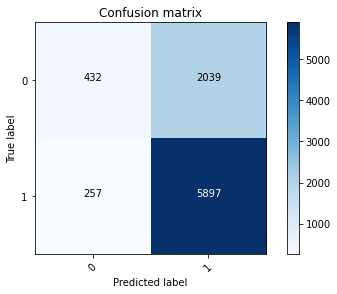

In [ ]:
(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test

# before - 73.37

In [ ]:
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
0,0.554409,0.954185,0.030077,0.037794,0.120741,0.485496,0.036127,0.024935,0.724688,0.687414,0.659533,0.254760,0.445797,0.204301,0.269042,0.342121,0.255645,0.000909,0.692956,0.145995,0.000195,0.000140,0.000595,0.002380,0.019768,0.003349,0.002076,0.008586,0.484848,0.992746,0.004273,0.018292,0.044101,0.023490,0.000686,0.006097,0.000866,0.531128,0.916412,0.044543,0.039008,0.026032,0.043098,0.002438,0.001863,0.002341,0.001146,0.000481,0.001183,0.000326,0.002930,0.000425
1,0.554409,0.872567,0.129534,0.060582,0.131236,0.475193,0.061065,0.044126,0.665895,0.637721,0.658954,0.189497,0.455001,0.129240,0.314959,0.368339,0.383652,0.004337,0.497850,0.335798,0.001236,0.003969,0.004046,0.005868,0.004805,0.003425,0.023577,0.037501,0.507856,0.973665,0.011974,0.051844,0.071469,0.063572,0.003761,0.011651,0.004859,0.531278,0.947279,0.017301,0.063816,0.041504,0.069742,0.005696,0.003582,0.005624,0.003131,0.001114,0.003268,0.002370,0.006323,0.003160
2,0.554409,0.875760,0.053308,0.051885,0.125660,0.527679,0.047793,0.036672,0.614474,0.659541,0.670539,0.306680,0.466124,0.249301,0.307996,0.388196,0.281158,0.002304,0.534602,0.240465,0.000127,0.000615,0.001839,0.004171,0.003213,0.000694,0.005096,0.012374,0.497334,0.994857,0.008207,0.035709,0.057111,0.053619,0.001990,0.008569,0.003571,0.535169,0.969899,0.019488,0.044034,0.029825,0.055853,0.003087,0.002242,0.003737,0.001514,0.000637,0.002011,0.001111,0.004325,0.002134
3,0.554409,0.948008,0.018495,0.055933,0.129882,0.527256,0.052124,0.031017,0.767878,0.719781,0.714437,0.241831,0.487635,0.163006,0.285184,0.299236,0.302467,0.001435,0.758943,0.109339,0.000091,0.000196,0.000354,0.004708,0.006989,0.002458,0.001488,0.018553,0.492144,0.988159,0.004702,0.024148,0.034689,0.032008,0.001037,0.004500,0.001449,0.512272,0.927194,0.035219,0.049951,0.028877,0.057046,0.003802,0.002144,0.003884,0.001907,0.000538,0.002090,0.000509,0.002080,0.000736
4,0.554409,0.882132,0.167490,0.040862,0.126643,0.495048,0.043023,0.043650,0.506503,0.444139,0.585915,0.256302,0.483220,0.195111,0.569984,0.513598,0.715080,0.004591,0.319054,0.460057,0.000664,0.003615,0.004140,0.005796,0.002809,0.001750,0.021728,0.033340,0.494949,0.973406,0.012228,0.056952,0.083737,0.067179,0.004446,0.014574,0.005372,0.525441,0.974891,0.019637,0.034175,0.030393,0.038623,0.001978,0.002301,0.001927,0.000904,0.000586,0.000937,0.002868,0.008747,0.003587


In [ ]:
df.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05,1.0,1.0,1.0,1.0
2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06,1.0,1.0,1.0,1.0
3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06,1.0,1.0,1.0,1.0
4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06,1.0,1.0,1.0,1.0
5,21.068922,1.978037,4.438428,5.931410,28.607774,-0.042457,7.590096,47.573406,-1.224950,-1.533386,-0.815867,0.683165,0.593045,0.773488,-0.242990,-0.408387,-0.044327,374.320370,0.632694,1.956614,0.040687,140.404364,39.567139,12.284715,0.000290,0.001028,11.429192,3.549538,-1.387779e-17,-0.941164,0.652005,23.119072,5.681090,51.873429,137232.934577,6263.740351,522041.292553,-5.204170e-18,-0.040246,0.058274,5.439941,1.609547,12.816591,7224.609816,502.593097,31867.747248,35059.744416,800.645468,186025.445662,1.165839e+06,28539.765305,5.024418e+06,1.0,1.0,1.0,1.0


# Proposed Feature Selection Methods

### 1. Using Mututal Information to remove redundant features

In [ ]:
# configure to select all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


In [ ]:
mi = mutual_info_classif(X,y)
mi

array([0.00109219, 0.00324755, 0.        , 0.01070575, 0.00208474,
       0.        , 0.0101435 , 0.        , 0.        , 0.00717606,
       0.        , 0.00325707, 0.00392622, 0.        , 0.00085182,
       0.0089291 , 0.00229732, 0.00433917, 0.00029256, 0.0005256 ,
       0.00310505, 0.        , 0.00089517, 0.00391475, 0.        ,
       0.        , 0.        , 0.00035998, 0.        , 0.00078397,
       0.        , 0.00157363, 0.        , 0.0079708 , 0.00586185,
       0.        , 0.00324605, 0.        , 0.00594283, 0.00108021,
       0.00781088, 0.00412202, 0.00133488, 0.00962617, 0.00630587,
       0.00124448, 0.00797188, 0.00170412, 0.00299237, 0.00471664,
       0.        , 0.00519718])

In [ ]:
np.sort(mi)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00029256, 0.00035998, 0.0005256 , 0.00078397,
       0.00085182, 0.00089517, 0.00108021, 0.00109219, 0.00124448,
       0.00133488, 0.00157363, 0.00170412, 0.00208474, 0.00229732,
       0.00299237, 0.00310505, 0.00324605, 0.00324755, 0.00325707,
       0.00391475, 0.00392622, 0.00412202, 0.00433917, 0.00471664,
       0.00519718, 0.00586185, 0.00594283, 0.00630587, 0.00717606,
       0.00781088, 0.0079708 , 0.00797188, 0.0089291 , 0.00962617,
       0.0101435 , 0.01070575])

In [ ]:
mi.argsort()[-34:][::-1]

array([ 3,  6, 43, 15, 46, 33, 40,  9, 44, 38, 34, 51, 49, 17, 41, 12, 23,
       11,  1, 36, 20, 48, 16,  4, 47, 31, 42, 45,  0, 39, 22, 14, 29, 19])

In [ ]:
arr = mi
ind = arr.argsort()[-40:][::-1]
ser =  X.columns
features = ser[ind]
print(features)
new_X = select_columns(X,features)

Index(['secDiffMean', 'first_diff_mean', 'cD_Energy_mean', 'AR3_min',
       'Entropy_D_mean', 'cA_std_max', 'cD_std_mean', 'AR1_min',
       'cD_Energy_min', 'cD_mean_min', 'cA_Energy_mean', 'Entropy_A_max',
       'Entropy_A_mean', 'hjorth_activity', 'cD_std_min', 'AR2_min', 'PMax4',
       'AR2_mean', 'fractal_dimension', 'cA_Energy_max', 'PMax1',
       'Entropy_D_max', 'AR3_max', 'secDiffMax', 'Entropy_D_min',
       'cA_std_mean', 'cD_std_max', 'cD_Energy_max', 'coeff_var',
       'cD_mean_max', 'PMax3', 'AR3_mean', 'cA_mean_min', 'hjorth_complexity',
       'PRatio4', 'hjorth_mobility', 'first_diff_max', 'PRatio1', 'kurtosis',
       'cD_mean_mean'],
      dtype='object')


(26136, 40) (26136,)
Accuracy 0.735304347826087
              precision    recall  f1-score   support

         0.0       0.63      0.18      0.29      2471
         1.0       0.74      0.96      0.84      6154

    accuracy                           0.74      8625
   macro avg       0.69      0.57      0.56      8625
weighted avg       0.71      0.74      0.68      8625

ROC_AUC_score : 0.570496


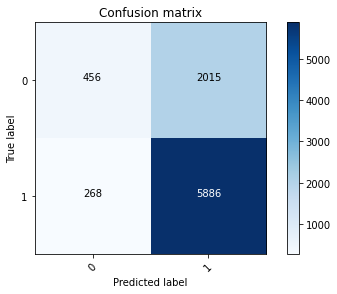

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
predicts["mi"] = y_pred 
test["mi"] = y_test
# 40 - 73.53%

# Using Boruta

In [ ]:
!pip install boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np
###initialize Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 8
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 40 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(new_X), y)
### print results
green_area = new_X.columns[boruta.support_].to_list()
blue_area = new_X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)


     |████████████████████████████████| 61kB 3.9MB/s 
features in the green area: ['secDiffMean', 'first_diff_mean', 'cD_Energy_mean', 'AR3_min', 'Entropy_D_mean', 'cA_std_max', 'cD_std_mean', 'AR1_min', 'cD_Energy_min', 'cA_Energy_mean', 'Entropy_A_max', 'Entropy_A_mean', 'hjorth_activity', 'cD_std_min', 'AR2_min', 'PMax4', 'AR2_mean', 'fractal_dimension', 'cA_Energy_max', 'PMax1', 'Entropy_D_max', 'AR3_max', 'secDiffMax', 'Entropy_D_min', 'cA_std_mean', 'cD_std_max', 'cD_Energy_max', 'PMax3', 'AR3_mean', 'cA_mean_min', 'hjorth_complexity', 'PRatio4', 'hjorth_mobility', 'first_diff_max', 'kurtosis']
features in the blue area: []


(26136, 30) (26136,)
Accuracy 0.7382028985507246
              precision    recall  f1-score   support

         0.0       0.63      0.20      0.31      2471
         1.0       0.75      0.95      0.84      6154

    accuracy                           0.74      8625
   macro avg       0.69      0.58      0.57      8625
weighted avg       0.72      0.74      0.69      8625

ROC_AUC_score : 0.578219


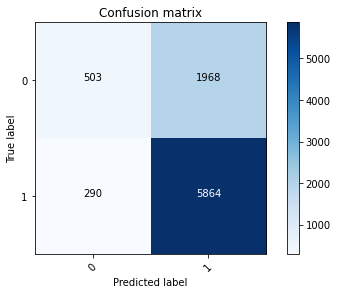

In [ ]:
feat = boruta.support_
'''
ind = np.where(feat==1)
ser =  new_X.columns
features = ser[ind]
new_XX = select_columns(new_X,features)
'''

rank = boruta.ranking_   # best feature has rank 1
inds = rank.argsort()[0:30]
ser =  new_X.columns
features = ser[inds]
new_XX = select_columns(new_X,features)

(y_test,y_pred) = run_model(new_XX,y);
predicts["Boruta"] = y_pred 
test["Boruta"] = y_test
# 30 - 73.82

# RFE

In [ ]:
print(new_XX.shape)
new_XX.head()

(26136, 30)


,secDiffMean,PMax1,Entropy_D_max,AR3_max,secDiffMax,Entropy_D_min,cA_std_mean,cD_std_max,cD_Energy_max,PMax3,AR3_mean,cA_mean_min,hjorth_complexity,PRatio4,hjorth_mobility,first_diff_max,kurtosis,fractal_dimension,cA_Energy_max,PMax4,AR3_min,Entropy_D_mean,cA_std_max,cD_std_mean,AR1_min,AR2_mean,cD_Energy_mean,cD_Energy_min,cA_Energy_mean,Entropy_A_max
0,0.037794,0.000195,0.001183,0.255645,0.120741,0.000481,0.018292,0.043098,0.002341,0.000595,0.269042,0.992746,0.145995,0.008586,0.692956,0.024935,0.030077,0.954185,0.000866,0.002380,0.342121,0.001146,0.023490,0.039008,0.687414,0.254760,0.002438,0.001863,0.000686,0.000425
1,0.060582,0.001236,0.003268,0.383652,0.131236,0.001114,0.051844,0.069742,0.005624,0.004046,0.314959,0.973665,0.335798,0.037501,0.497850,0.044126,0.129534,0.872567,0.004859,0.005868,0.368339,0.003131,0.063572,0.063816,0.637721,0.189497,0.005696,0.003582,0.003761,0.003160
2,0.051885,0.000127,0.002011,0.281158,0.125660,0.000637,0.035709,0.055853,0.003737,0.001839,0.307996,0.994857,0.240465,0.012374,0.534602,0.036672,0.053308,0.875760,0.003571,0.004171,0.388196,0.001514,0.053619,0.044034,0.659541,0.306680,0.003087,0.002242,0.001990,0.002134
3,0.055933,0.000091,0.002090,0.302467,0.129882,0.000538,0.024148,0.057046,0.003884,0.000354,0.285184,0.988159,0.109339,0.018553,0.758943,0.031017,0.018495,0.948008,0.001449,0.004708,0.299236,0.001907,0.032008,0.049951,0.719781,0.241831,0.003802,0.002144,0.001037,0.000736
4,0.040862,0.000664,0.000937,0.715080,0.126643,0.000586,0.056952,0.038623,0.001927,0.004140,0.569984,0.973406,0.460057,0.033340,0.319054,0.043650,0.167490,0.882132,0.005372,0.005796,0.513598,0.000904,0.067179,0.034175,0.444139,0.256302,0.001978,0.002301,0.004446,0.003587


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model = RandomForestClassifier()
#model = LogisticRegression()

selector = RFE(model,n_features_to_select=15, step=1)
selector.fit(new_XX,y)


RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

(26136, 15) (26136,)
Accuracy 0.7315942028985507
              precision    recall  f1-score   support

         0.0       0.61      0.18      0.27      2471
         1.0       0.74      0.95      0.84      6154

    accuracy                           0.73      8625
   macro avg       0.68      0.57      0.55      8625
weighted avg       0.70      0.73      0.67      8625

ROC_AUC_score : 0.565232


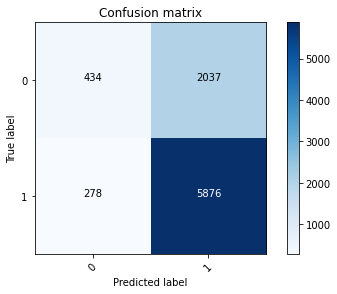

In [ ]:
selected_feat = new_XX.columns[(selector.get_support())]
new_XXX = select_columns(new_XX,selected_feat)
(y_test,y_pred) = run_model(new_XXX,y);

test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred
# 15 - 73.15

In [ ]:
for key in predicts.keys():
  print(key)


Before feature selection
mi
Boruta
Recursive Feature Elimination


KeyError: ignored

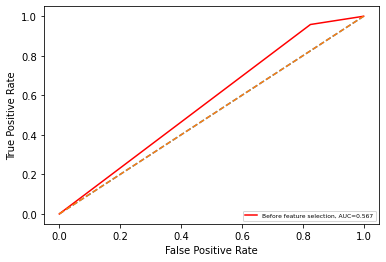

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
colour={"Before feature selection": 'r-',
        "Recursive Feature Elimination": 'b-',
        }
for key in test.keys():
    fpr, tpr, thresholds = roc_curve(test[key], predicts[key])
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr,colour[key],label = "{}, AUC={:.3f}".format(key, roc_auc_score(test[key],predicts[key])))
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    name = 'ROC curve for '+key
    plt.legend(prop={'size':6}, loc='lower right')
#     pyplot.title(name)

(26136, 10) (26136,)
Accuracy 0.7325217391304348
              precision    recall  f1-score   support

         0.0       0.60      0.20      0.30      2471
         1.0       0.75      0.95      0.83      6154

    accuracy                           0.73      8625
   macro avg       0.67      0.57      0.57      8625
weighted avg       0.70      0.73      0.68      8625

ROC_AUC_score : 0.573027


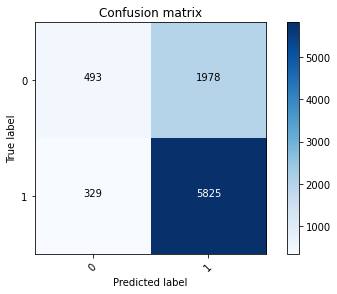

In [ ]:
# 10 FEATURES

selector = RFE(model,n_features_to_select=10, step=1)
selector.fit(new_XX,y)
selected_feat = new_XX.columns[(selector.get_support())]
new_XXX = select_columns(new_XX,selected_feat)
(y_test,y_pred) = run_model(new_XXX,y);
test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred

# EVEN WITH 10 FEATURES ACCURACY - 73.2

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
colour={"Before feature selection": 'r-',
        "Recursive Feature Elimination": 'b-',
        }
for key in test.keys():
    fpr, tpr, thresholds = roc_curve(test[key], predicts[key])
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr,colour[key],label = "{}, AUC={:.3f}".format(key, roc_auc_score(test[key],predicts[key])))
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    name = 'ROC curve for '+key
    plt.legend(prop={'size':6}, loc='lower right')
#     pyplot.title(name)

# 2. MI, Feature Importnaces, Lasso, RFE

Index(['secDiffMean', 'first_diff_mean', 'cD_Energy_mean', 'AR3_min',
       'Entropy_D_mean', 'cA_std_max', 'cD_std_mean', 'AR1_min',
       'cD_Energy_min', 'cD_mean_min', 'cA_Energy_mean', 'Entropy_A_max',
       'Entropy_A_mean', 'hjorth_activity', 'cD_std_min', 'AR2_min', 'PMax4',
       'cA_Energy_max', 'AR2_mean', 'PMax1', 'Entropy_D_max',
       'fractal_dimension', 'AR3_max', 'coeff_var', 'secDiffMax',
       'Entropy_D_min', 'cA_std_mean', 'cD_std_max', 'cD_Energy_max',
       'cD_mean_max', 'PMax3', 'AR3_mean', 'cA_mean_min', 'cA_mean_mean',
       'hjorth_complexity', 'PRatio4', 'hjorth_mobility', 'skewness',
       'kurtosis', 'first_diff_max'],
      dtype='object')
(26136, 40) (26136,)
Accuracy 0.7336811594202899
              precision    recall  f1-score   support

         0.0       0.63      0.17      0.27      2471
         1.0       0.74      0.96      0.84      6154

    accuracy                           0.73      8625
   macro avg       0.68      0.57      0.55 

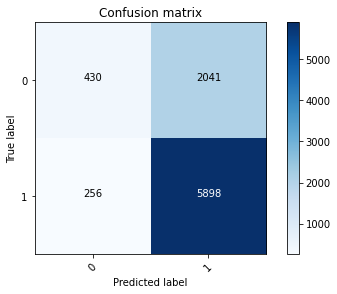

In [ ]:
# configure to select all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X,y)
arr = mi
ind = arr.argsort()[-40:][::-1]
ser =  X.columns
features = ser[ind]
print(features)
new_X = select_columns(X,features)
(y_test,y_pred) = run_model(new_X,y);
predicts["mi"] = y_pred 
test["mi"] = y_test

#  40-73.3

# Feature Importances

(26136, 30) (26136,)
Accuracy 0.7341449275362318
              precision    recall  f1-score   support

         0.0       0.63      0.17      0.27      2471
         1.0       0.74      0.96      0.84      6154

    accuracy                           0.73      8625
   macro avg       0.69      0.57      0.55      8625
weighted avg       0.71      0.73      0.67      8625

ROC_AUC_score : 0.565445


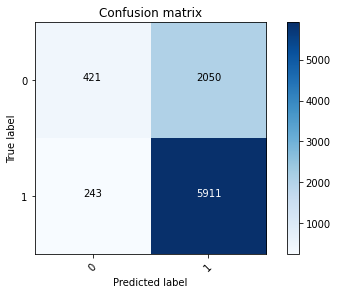

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(new_X, y)
importance = model.feature_importances_
important_features_dict = {}
for x,i in enumerate(importance):
	important_features_dict[x]=i
important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
ind = important_features_list[0:30]   # take best 30 features
features = new_X.columns[ind]
new_XX = select_columns(new_X,features)

(y_test,y_pred) = run_model(new_XX,y);
predicts["Feature Importance - Random Forest"] = y_pred 
test["Feature Importance - Random Forest"] = y_test
# 30- 73.41


# Lasso

(26136, 30) (26136,)
Accuracy 0.7335652173913043
              precision    recall  f1-score   support

         0.0       0.63      0.17      0.27      2471
         1.0       0.74      0.96      0.84      6154

    accuracy                           0.73      8625
   macro avg       0.69      0.57      0.55      8625
weighted avg       0.71      0.73      0.67      8625

ROC_AUC_score : 0.565039


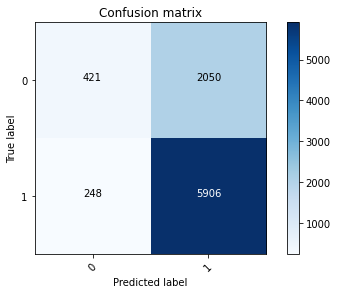

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'),threshold=-np.inf,max_features = 30) 
sel_.fit(new_XX, y)
selected_feat = new_XX.columns[(sel_.get_support())]
new_XXX = select_columns(new_XX,selected_feat)


(y_test,y_pred )= run_model(new_XXX,y);
predicts["Lasso"] = y_pred
test["Lasso"] = y_test

# 30- 73.35


# RFE

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier()
#model = LogisticRegression()

selector = RFE(model,n_features_to_select=15, step=1)
selector.fit(new_XXX,y)



RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

(26136, 15) (26136,)
Accuracy 0.7318260869565217
              precision    recall  f1-score   support

         0.0       0.61      0.18      0.27      2471
         1.0       0.74      0.96      0.84      6154

    accuracy                           0.73      8625
   macro avg       0.68      0.57      0.55      8625
weighted avg       0.71      0.73      0.67      8625

ROC_AUC_score : 0.565273


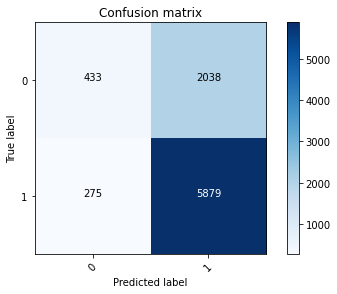

In [ ]:
selected_feat = new_XXX.columns[(selector.get_support())]
new_XXXX = select_columns(new_XXX,selected_feat)

(y_test,y_pred) = run_model(new_XXXX,y);

test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred
# 15 - 73.18

# 3. MI,Boruta,Forward Sequential , RFE

## MI

Index(['secDiffMean', 'Entropy_A_max', 'Entropy_A_mean', 'cD_std_max',
       'Entropy_D_max', 'cD_Energy_max', 'first_diff_max', 'Entropy_D_min',
       'cD_std_mean', 'PMax2', 'AR2_mean', 'cD_mean_mean', 'PRatio4',
       'hjorth_complexity', 'cD_std_min', 'cD_Energy_min', 'AR3_max',
       'secDiffMax', 'cA_Energy_max', 'fractal_dimension', 'coeff_var',
       'hjorth_activity', 'cD_mean_min', 'cD_Energy_mean', 'cA_std_max',
       'cA_std_min', 'PRatio3', 'PRatio1', 'AR3_mean', 'Entropy_D_mean',
       'cA_mean_mean', 'PRatio2', 'AR1_max', 'cA_Energy_mean', 'cA_mean_min',
       'AR3_min', 'Entropy_A_min', 'AR2_max', 'hjorth_mobility', 'PMax1'],
      dtype='object')
(5215, 40) (5215,)
Accuracy 0.6455549099360837
              precision    recall  f1-score   support

         0.0       0.54      0.28      0.37       634
         1.0       0.67      0.86      0.75      1087

    accuracy                           0.65      1721
   macro avg       0.60      0.57      0.56      1721
w

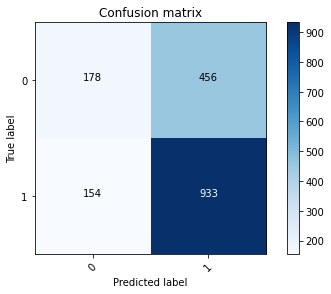

In [ ]:
# configure to select all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X,y)
arr = mi
ind = arr.argsort()[-40:][::-1]
ser =  X.columns
features = ser[ind]
print(features)
new_X = select_columns(X,features)
(y_test,y_pred) = run_model(new_X,y);
predicts["mi"] = y_pred 
test["mi"] = y_test


## Lasso

In [ ]:
new_X.shape

(5215, 40)

(5215, 21) (5215,)
Accuracy 0.6490412550842534
              precision    recall  f1-score   support

         0.0       0.55      0.27      0.36       634
         1.0       0.67      0.87      0.76      1087

    accuracy                           0.65      1721
   macro avg       0.61      0.57      0.56      1721
weighted avg       0.63      0.65      0.61      1721

ROC_AUC_score : 0.570001


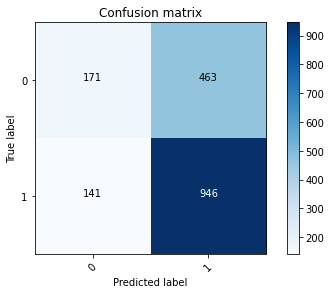

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'),max_features = 32) 
sel_.fit(new_X, y)
selected_feat = new_X.columns[(sel_.get_support())]
new_XX = select_columns(new_X,selected_feat)

(y_test,y_pred )= run_model(new_XX,y);
predicts["Lasso"] = y_pred
test["Lasso"] = y_test

## RFE

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier()
#model = LogisticRegression()

selector = RFE(model,n_features_to_select=15, step=1)
selector.fit(new_XX,y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

(5215, 15) (5215,)
Accuracy 0.6409064497385241
              precision    recall  f1-score   support

         0.0       0.52      0.29      0.37       634
         1.0       0.67      0.85      0.75      1087

    accuracy                           0.64      1721
   macro avg       0.60      0.57      0.56      1721
weighted avg       0.62      0.64      0.61      1721

ROC_AUC_score : 0.567834


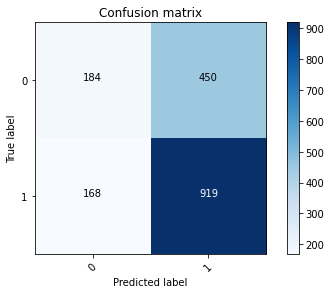

In [ ]:
selected_feat = new_XX.columns[(selector.get_support())]
new_XXX = select_columns(new_XX,selected_feat)

(y_test,y_pred) = run_model(new_XXX,y);

test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred

## Foward/ Backward sequnetial

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
sfs1 = sfs(clf,
           k_features=10,   # 15 features to select   
           forward=True,   # forward seelction
           floating=True,  #  floating algorithm
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1.fit(np.array(new_XXX), y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   27.9s finished

[2021-02-05 09:24:16] Features: 1/12 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s finished

[2021-02-05 09:24:42] Features: 2/12 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | 

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [ ]:
features = sfs1.k_feature_names_
features = np.array(features)
fet = new_XXX.columns
features

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '19'],
      dtype='<U2')

In [ ]:
features = fet[[0,1,2,3,4,5,6,7,8,9,10,19]]

(5240, 12) (5240,)
Accuracy 0.6358381502890174
              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29       628
         1.0       0.66      0.88      0.76      1102

    accuracy                           0.64      1730
   macro avg       0.58      0.54      0.52      1730
weighted avg       0.60      0.64      0.59      1730

ROC_AUC_score : 0.542585


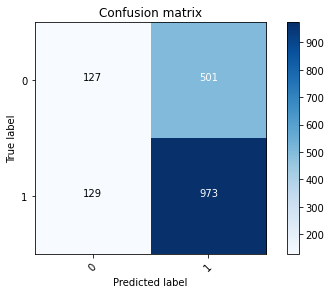

In [ ]:
new_XXXX = sfs1.transform(new_XXX)

new_XXXX = select_columns(new_XXX,features)
(y_test,y_pred) = run_model(new_XXXX,y);
predicts["Sequential"] = y_pred 
test["Sequential"] = y_test

## Backward

In [ ]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
sfs1 = sfs(clf,
           k_features=10,   # 15 features to select   
           forward=False,   # forward seelction
           floating=True,  #  floating algorithm
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1.fit(np.array(new_XXX), y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   48.2s finished

[2021-02-05 09:41:11] Features: 22/12 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   44.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished

[2021-02-05 09:41:58] Features: 21/12 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [ ]:
features = sfs1.k_feature_names_
features = np.array(features)
fet = new_XXX.columns
features

NameError: ignored

(5240, 12) (5240,)
Accuracy 0.63121387283237
              precision    recall  f1-score   support

         0.0       0.48      0.21      0.30       628
         1.0       0.66      0.87      0.75      1102

    accuracy                           0.63      1730
   macro avg       0.57      0.54      0.52      1730
weighted avg       0.60      0.63      0.59      1730

ROC_AUC_score : 0.541352


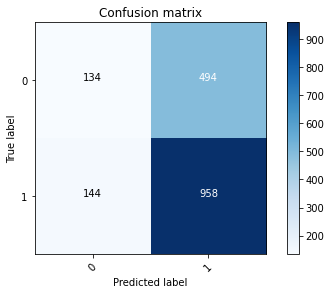

In [ ]:
features = fet[[0,1,2,3,4,5,6,7,8,9,10,11]]

new_XXXX = sfs1.transform(new_XXX)
new_XXXX = select_columns(new_XXX,features)

(y_test,y_pred) = run_model(new_XXXX,y);
predicts["Sequential"] = y_pred 
test["Sequential"] = y_test

# 4. seqeential, MI, rfe

Index(['Entropy_D_mean', 'cD_std_mean', 'PRatio4', 'Entropy_D_max',
       'first_diff_mean', 'AR1_max', 'cD_std_min', 'cA_std_mean',
       'cD_Energy_mean', 'cD_Energy_min', 'AR2_min', 'hjorth_complexity',
       'PMax1', 'skewness', 'AR1_min', 'Entropy_A_min', 'secDiffMax',
       'AR2_max', 'hjorth_activity', 'Entropy_A_max', 'cA_mean_mean', 'PMax4',
       'cA_Energy_max', 'cA_mean_min', 'AR3_max', 'coeff_var', 'cD_mean_mean',
       'hjorth_mobility', 'AR3_mean', 'fractal_dimension', 'AR3_min', 'PMax2',
       'secDiffMean', 'cA_std_max', 'Entropy_A_mean', 'cD_mean_min',
       'cA_Energy_mean', 'AR1_mean', 'kurtosis', 'Entropy_D_min'],
      dtype='object')
(5221, 40) (5221,)
Accuracy 0.6436448055716774
              precision    recall  f1-score   support

         0.0       0.55      0.34      0.42       656
         1.0       0.67      0.83      0.74      1067

    accuracy                           0.64      1723
   macro avg       0.61      0.59      0.58      1723
weighted

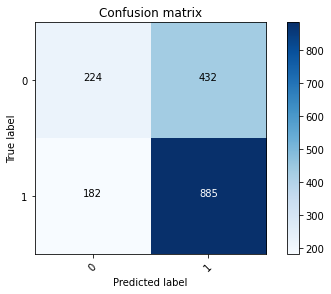

In [ ]:
# configure to select all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X,y)
arr = mi
ind = arr.argsort()[-40:][::-1]
ser =  X.columns
features = ser[ind]
print(features)
new_X = select_columns(X,features)
(y_test,y_pred) = run_model(new_X,y);
predicts["mi"] = y_pred 
test["mi"] = y_test

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier()
#model = LogisticRegression()

selector = RFE(model,n_features_to_select=28, step=1)
selector.fit(new_X,y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=28, step=1, verbose=0)

(5221, 28) (5221,)
Accuracy 0.636680208937899
              precision    recall  f1-score   support

         0.0       0.54      0.29      0.38       656
         1.0       0.66      0.85      0.74      1067

    accuracy                           0.64      1723
   macro avg       0.60      0.57      0.56      1723
weighted avg       0.62      0.64      0.61      1723

ROC_AUC_score : 0.570721


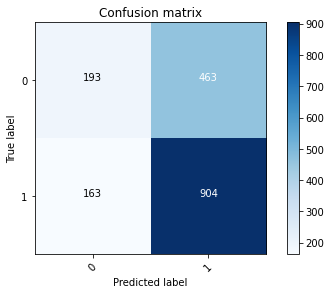

In [ ]:
selected_feat = new_X.columns[(selector.get_support())]
new_XX = select_columns(new_X,selected_feat)

(y_test,y_pred) = run_model(new_XX,y);

test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred

In [ ]:
# after rfe
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
sfs1 = sfs(clf,
           k_features=15,   # 15 features to select   
           forward=True,   # forward seelction
           floating=True,  #  floating algorithm
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1.fit(np.array(new_XX), y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   32.3s finished

[2021-02-05 16:10:17] Features: 1/15 -- score: 0.9996169316222946[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   27.5s finished
[Parallel(n_jobs=1)]: Using ba

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [ ]:
features = sfs1.k_feature_names_
features = np.array(features)
fet = new_XX.columns
features

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14'], dtype='<U2')

In [ ]:
features = fet[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]

(5221, 15) (5221,)
Accuracy 0.6453859547301218
              precision    recall  f1-score   support

         0.0       0.56      0.31      0.40       656
         1.0       0.67      0.85      0.75      1067

    accuracy                           0.65      1723
   macro avg       0.61      0.58      0.57      1723
weighted avg       0.63      0.65      0.62      1723

ROC_AUC_score : 0.580393


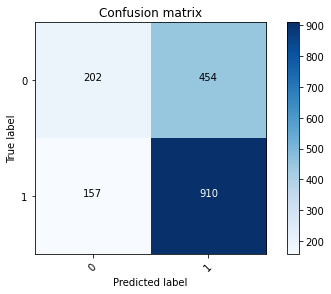

In [ ]:
new_XXX = sfs1.transform(new_XX)

new_XXX = select_columns(new_XX,features)
(y_test,y_pred) = run_model(new_XXX,y);
predicts["Sequential"] = y_pred 
test["Sequential"] = y_test